Information from Office For National Statistics

Ethnic contrasts in COVID-19 deaths data first and second waves of the pandemic

"Main points During the first wave of the coronavirus (COVID-19) pandemic (24 January 2020 to 11 September 2020), people from all ethnic minority groups (except for women in the Chinese or "White Other" ethnic groups) had higher rates of death involving the coronavirus compared with the White British population.

The rate of death involving COVID-19 was highest for the Black African group (3.7 times greater than for the White British group for males, and 2.6 greater for females), followed by the Bangladeshi (3.0 for males, 1.9 for females), Black Caribbean (2.7 for males, 1.8 for females) and Pakistani (2.2 for males, 2.0 for females) ethnic groups.

In the second wave of the pandemic (from 12 September 2020 onwards), the differences in COVID-19 mortality compared with the White British population increased for people of Bangladeshi and Pakistani ethnic backgrounds; the Bangladeshi group had the highest rates, 5.0 and 4.1 times greater than for White British males and females respectively.

Whilst males and females of Black Caribbean and Black African background remained at elevated risk in the second wave, the relative risk compared with White British people was reduced compared with the first wave.

Adjusting for location, measures of disadvantage, occupation, living arrangements and pre-existing health conditions accounted for a large proportion of the excess COVID-19 mortality risk in most ethnic minority groups; however, most Black and South Asian groups remained at higher risk than White British people in the second wave even after adjustments."

https://www.ons.gov.uk/peoplepopulationandcommunity/healthandsocialcare/conditionsanddiseases/articles/coronaviruscovid19/latestinsights

### **Are regions in London more prone to Covid-19 /cases/ deaths if they have a large ethnic dermagraphic?**

- Is the COVID-19 death rate higher in London Regions with a high ethnic dermagraphic?

#### Data required to answer the question

- Population (London total)
- Ethnic groups (London total)
- Covid deaths (London total)
- London Region, there are 32 boroughs and 5 regions

###### London is divided into 32 Boroughs (local authority districts),  together with the City of London they make up the administrative area of Greater London; The City of London is not a Borough it is a ceremonial county (local government district) it functions differently from the London boroughs.

In [22]:
# Import necessary libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


In [23]:
# London Population
lon_pop = pd.read_csv("https://raw.githubusercontent.com/VonnieC1/CFG-Final-Group-Project-/main/data/population_c.csv")
lon_pop = lon_pop[['Region', 'sum_population']]

lon_pop.head()

,Region,sum_population
0,Central,8706
1,East,8726038
2,North,392140
3,East,8032233
4,West,330795


In [24]:
# London Ethnicity (breakdown of London ethnic population)
lon_eth_pop = pd.read_csv("https://raw.githubusercontent.com/VonnieC1/CFG-Final-Group-Project-/main/data/ethnic_c.csv")
lon_eth_pop = lon_eth_pop[['Region', 'all_bame_prop', 
                           'all_black_prop', 'pakistani_or_bangladeshi_prop',
                           'all_indian_prop']]
lon_eth_pop.head()

,Region,all_bame_prop,all_black_prop,pakistani_or_bangladeshi_prop,all_indian_prop
0,Central,0.213695,0.026169,0.033627,0.029288
1,East,379.570220,126.746115,50.951277,60.998296
2,North,14.661652,3.143220,0.869021,3.153673
3,East,351.375843,117.241440,48.082275,56.404288
4,West,21.736664,6.291008,1.786122,6.457155


In [25]:
# London Covid-19 Deaths
lon_covid_deaths = pd.read_csv("https://raw.githubusercontent.com/VonnieC1/CFG-Final-Group-Project-/main/data/deaths_c.csv")
lon_covid_deaths = lon_covid_deaths[['Region', 'Borough', 'covid_19_deaths']]

lon_covid_deaths.head()

,Region,Borough,covid_19_deaths
0,Central,City of London,3
1,East,Barking and Dagenham,4861
2,North,Barnet,287
3,East,Bexley,4415
4,West,Brent,304


In [26]:
# Join dataframes London's Population, Ethnic Population and Covid-19 Deaths.
london_all = pd.concat([lon_pop, lon_eth_pop, lon_covid_deaths], axis=1 )

# Drop duplicate columns
london_all = london_all.T.drop_duplicates().T

london_all.head()

,Region,sum_population,all_bame_prop,all_black_prop,pakistani_or_bangladeshi_prop,all_indian_prop,Borough,covid_19_deaths
0,Central,8706,0.213695,0.026169,0.033627,0.029288,City of London,3
1,East,8726038,379.57022,126.746115,50.951277,60.998296,Barking and Dagenham,4861
2,North,392140,14.661652,3.14322,0.869021,3.153673,Barnet,287
3,East,8032233,351.375843,117.24144,48.082275,56.404288,Bexley,4415
4,West,330795,21.736664,6.291008,1.786122,6.457155,Brent,304


In [10]:
# North London Region - Population, Ethnic Dermagraphic and Covid-19 Deaths.
north_lon = london_all.loc[london_all['Region'].str.contains('North'),
                                ['sum_population', 'all_bame_prop', 'all_black_prop',
                                 'pakistani_or_bangladeshi_prop', 'all_indian_prop', 
                                 'covid_19_deaths']].sum()
north_lon

sum_population                     11869789
all_bame_prop                    521.388934
all_black_prop                   170.056834
pakistani_or_bangladeshi_prop     80.009821
all_indian_prop                    79.18251
covid_19_deaths                        6331
dtype: object

In [11]:
# East London Region - Population, Ethnic Dermagraphic and Covid-19 Deaths.
east_lon = london_all.loc[london_all['Region'].str.contains('East'),
                                ['sum_population', 'all_bame_prop', 'all_black_prop',
                                 'pakistani_or_bangladeshi_prop', 'all_indian_prop', 
                                 'covid_19_deaths']].sum()
east_lon

sum_population                      36395158
all_bame_prop                    1604.329558
all_black_prop                    524.387286
pakistani_or_bangladeshi_prop     263.520649
all_indian_prop                   237.345498
covid_19_deaths                        19387
dtype: object

In [12]:
# South London Region - Population, Ethnic Dermagraphic and Covid-19 Deaths.
south_lon = london_all.loc[london_all['Region'].str.contains('South'),
                                ['sum_population', 'all_bame_prop', 'all_black_prop',
                                 'pakistani_or_bangladeshi_prop', 'all_indian_prop',
                                 'covid_19_deaths']].sum()
south_lon

sum_population                     16835800
all_bame_prop                    726.419942
all_black_prop                   238.587923
pakistani_or_bangladeshi_prop    110.437039
all_indian_prop                   105.80553
covid_19_deaths                        8868
dtype: object

In [13]:
# West London Region - Population, Ethnic Dermagraphic and Covid-19 Deaths.
west_lon = london_all.loc[london_all['Region'].str.contains('West'),
                                ['sum_population', 'all_bame_prop', 'all_black_prop',
                                 'pakistani_or_bangladeshi_prop', 'all_indian_prop',
                                 'covid_19_deaths']].sum()
west_lon

sum_population                     20856162
all_bame_prop                    933.925374
all_black_prop                   299.814782
pakistani_or_bangladeshi_prop    153.868974
all_indian_prop                  140.848469
covid_19_deaths                       10797
dtype: object

In [14]:
# Central London Region - Population, Ethnic Dermagraphic and Covid-19 Deaths.
central_lon = london_all.loc[london_all['Region'].str.contains('Central'),
                                ['sum_population', 'all_bame_prop', 'all_black_prop',
                                 'pakistani_or_bangladeshi_prop', 'all_indian_prop',
                                 'covid_19_deaths']].sum()
central_lon

sum_population                      6179831
all_bame_prop                    267.570189
all_black_prop                     89.77733
pakistani_or_bangladeshi_prop     53.108922
all_indian_prop                   26.145251
covid_19_deaths                        2978
dtype: object

In [27]:
# Create a dictionary with regions data.
regions = {
'Region': ['North', 'East', 'South', 'West','Central'],
'all_bame_prop': [521.388934,1604.329558,726.419942,933.925374,267.570189],
'all_black_prop': [170.056834, 524.387286, 238.587923, 299.814782, 89.77733],
'pakistani_or_bangladeshi_prop': [80.009821,263.520649,110.437039,153.868974,53.108922],
'all_indian_prop': [79.18251, 237.345498, 105.80553, 140.848469, 26.145251],
'covid_19_deaths': [6331, 19387, 8868,  10797, 2978],
}
                                                                 
# Create a Dataframe london all regions from regions dictionary 
lon_regions_df = pd.DataFrame(regions)
lon_regions_df

,Region,all_bame_prop,all_black_prop,pakistani_or_bangladeshi_prop,all_indian_prop,covid_19_deaths
0,North,521.388934,170.056834,80.009821,79.182510,6331
1,East,1604.329558,524.387286,263.520649,237.345498,19387
2,South,726.419942,238.587923,110.437039,105.805530,8868
3,West,933.925374,299.814782,153.868974,140.848469,10797
4,Central,267.570189,89.777330,53.108922,26.145251,2978


In [28]:
print(lon_regions_df.describe())

       all_bame_prop  all_black_prop  pakistani_or_bangladeshi_prop  \
count       5.000000        5.000000                       5.000000   
mean      810.726799      264.524831                     132.189081   
std       507.648101      165.005675                      82.412828   
min       267.570189       89.777330                      53.108922   
25%       521.388934      170.056834                      80.009821   
50%       726.419942      238.587923                     110.437039   
75%       933.925374      299.814782                     153.868974   
max      1604.329558      524.387286                     263.520649   

       all_indian_prop  covid_19_deaths  
count         5.000000         5.000000  
mean        117.865452      9672.200000  
std          78.832270      6169.788951  
min          26.145251      2978.000000  
25%          79.182510      6331.000000  
50%         105.805530      8868.000000  
75%         140.848469     10797.000000  
max         237.345498  

Text(0.5, 0.98, "London's total ethnic poulation and total Covid-19 deaths")

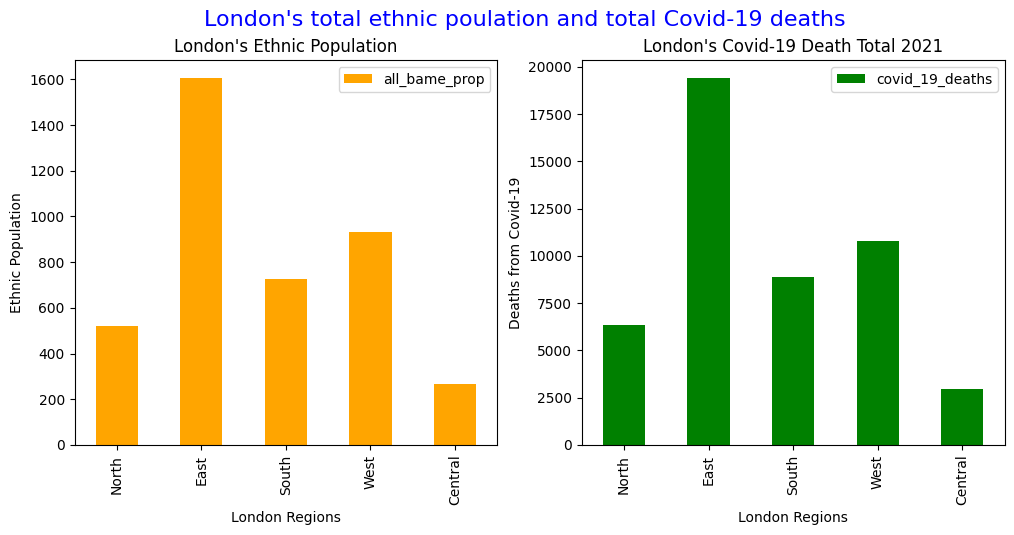

<Figure size 640x480 with 0 Axes>

In [29]:
# Plot Covid-19 deaths vs Londons total ethnic demagraphic
fig, ax = plt.subplots(ncols=2, figsize=(12,5))

fig1 = plt.figure(1)
lon_regions_df.plot(kind='bar',x='Region',y='all_bame_prop', color= 'orange', ax=ax[0],
                   title="London's Ethnic Population",xlabel='London Regions',ylabel='Ethnic Population')

fig2 = plt.figure(2)
lon_regions_df.plot(kind='bar',x= 'Region', y='covid_19_deaths', color= 'green', ax=ax[1],
                    title= "London's Covid-19 Death Total 2021", xlabel='London Regions', ylabel='Deaths from Covid-19')

fig.suptitle("London's total ethnic poulation and total Covid-19 deaths", color= 'blue', fontsize=16)

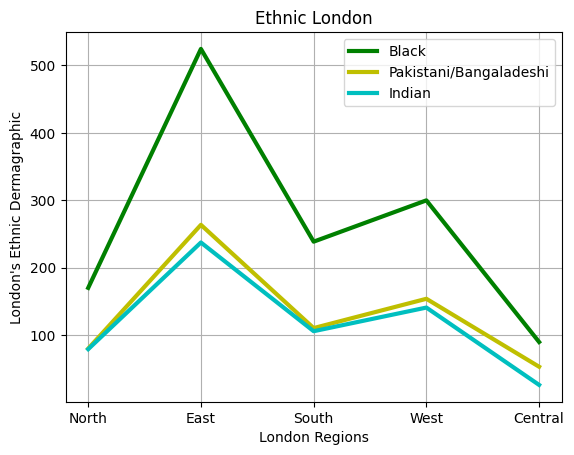

In [30]:
# Plot London dermagraphic split into ethnic groups
x = lon_regions_df['Region']

y1 = lon_regions_df['all_black_prop']
y2 = lon_regions_df['pakistani_or_bangladeshi_prop']
y3 = lon_regions_df['all_indian_prop']

plt.plot(x,y1,'g',label='Black', linewidth= 3)
plt.plot(x,y2,'y',label= 'Pakistani/Bangaladeshi', linewidth= 3)
plt.plot(x,y3,'c',label='Indian', linewidth= 3)

plt.title('Ethnic London')
plt.ylabel("London's Ethnic Dermagraphic")
plt.xlabel('London Regions')

# Plot grid and legends
plt.grid()
plt.legend()

<AxesSubplot: title={'center': "London's Deaths from Covid-19"}, xlabel='Region', ylabel='Deaths from Covid-18'>

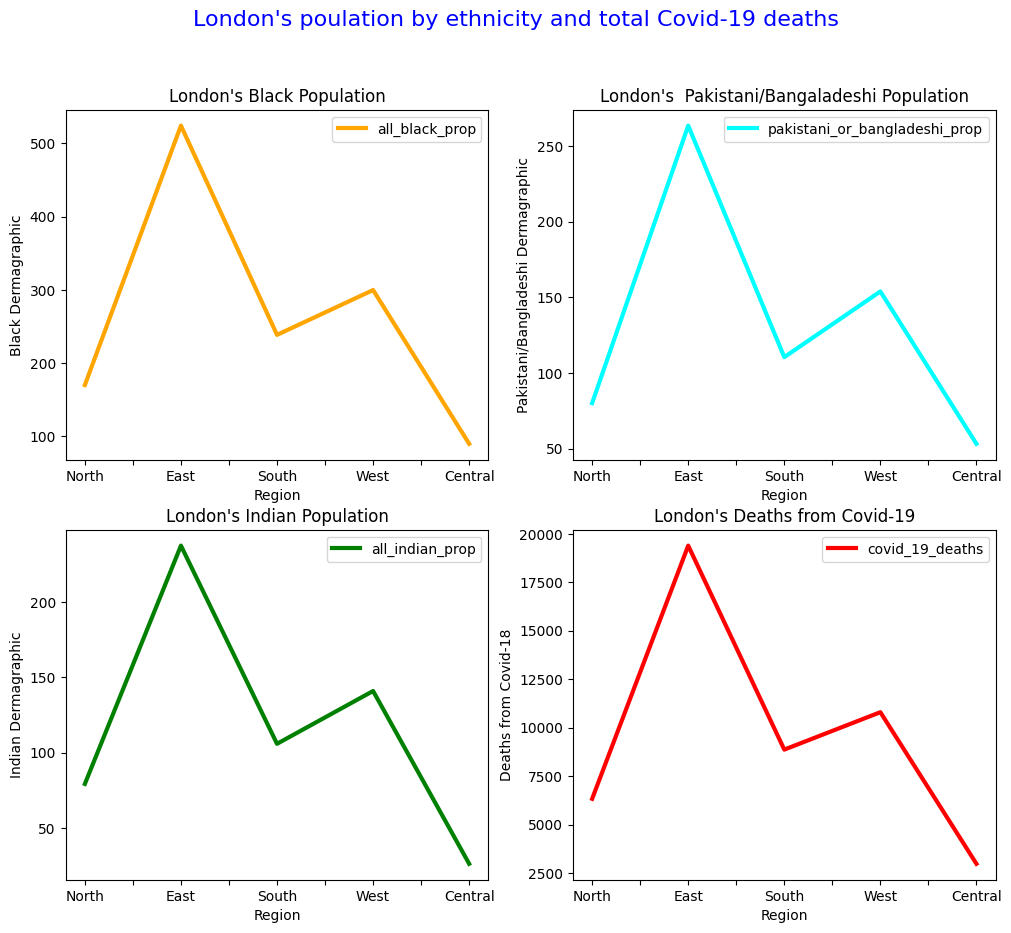

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [31]:
# London ethnic groups dermagraphic vs london's covid death
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
fig.suptitle("London's poulation by ethnicity and total Covid-19 deaths", color= 'blue', fontsize=16)

fig1 = plt.figure(1)
lon_regions_df.plot(kind='line',x='Region',y='all_black_prop', color= 'orange', 
              ax=ax[0,0],  linewidth=3, title= "London's Black Population", ylabel= 'Black Dermagraphic')

fig2 = plt.figure(2)
lon_regions_df.plot(kind='line',x= 'Region', y='pakistani_or_bangladeshi_prop', color= 'cyan', 
               ax=ax[0,1], linewidth=3, title= "London's  Pakistani/Bangaladeshi Population", ylabel= 'Pakistani/Bangladeshi Dermagraphic' )

fig2 = plt.figure(3)
lon_regions_df.plot(kind='line',x= 'Region', y='all_indian_prop', color= 'green', 
                ax=ax[1,0], linewidth=3, title= "London's Indian Population",  ylabel= 'Indian Dermagraphic')

fig2 = plt.figure(3)
lon_regions_df.plot(kind='line',x= 'Region', y='covid_19_deaths', color= 'red',  
                    ax=ax[1,1], linewidth=3, title= "London's Deaths from Covid-19", ylabel = 'Deaths from Covid-18')


The plots above show the ethnic breakdown of London by region and Covid deaths for the same regions. We can see that the shape of each plot is ialmost dentical which suggests that the death rate from Covid-19 is higher in the regions with a large ethnic population.

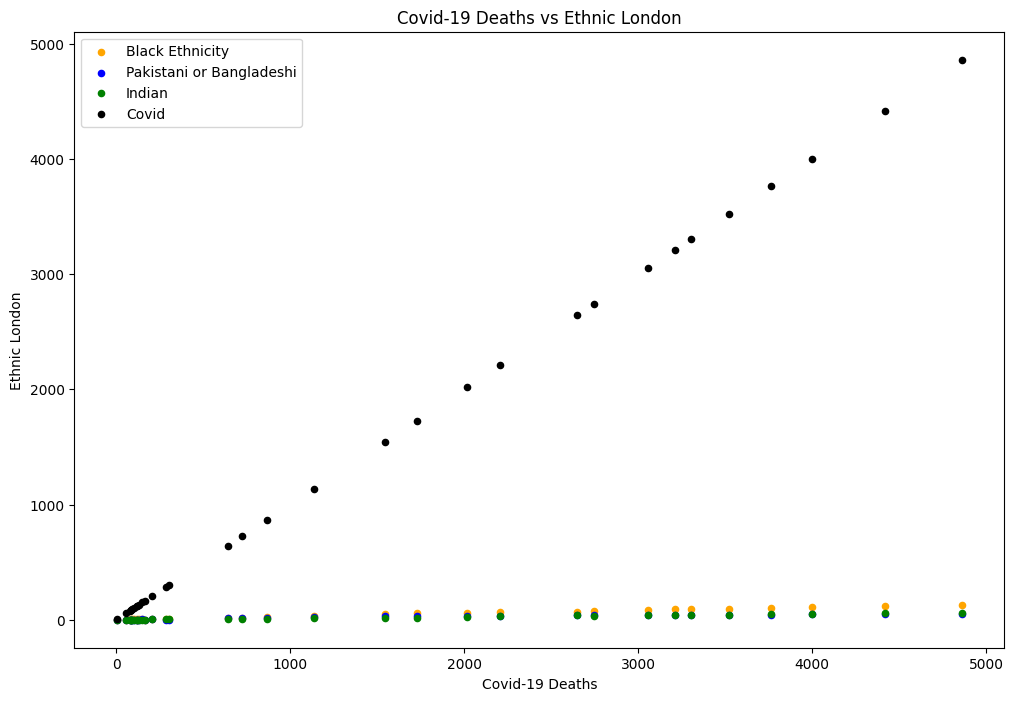

In [32]:
# Scatter plot showing Covid deaths against London's Ethnicities
fig = london_all.plot(kind='scatter',x='covid_19_deaths',y='all_black_prop',color='orange', label='Black Ethnicity')
london_all.plot(kind='scatter',x='covid_19_deaths',y='pakistani_or_bangladeshi_prop',color='blue', label='Pakistani or Bangladeshi',ax=fig)
london_all.plot(kind='scatter',x='covid_19_deaths',y='all_indian_prop',color='green', label='Indian', ax=fig)
london_all.plot(kind='scatter',x='covid_19_deaths',y='covid_19_deaths',color='black', label='Covid', ax=fig)


fig.set_xlabel("Covid-19 Deaths")
fig.set_ylabel("Ethnic London")
fig.set_title("Covid-19 Deaths vs Ethnic London")
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

In [37]:
# Calculate the attributes correlation
lon_regions_df.corr()

C:\Users\y_har\AppData\Local\Temp\ipykernel_16612\2242735584.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  lon_regions_df.corr()


,all_bame_prop,all_black_prop,pakistani_or_bangladeshi_prop,all_indian_prop,covid_19_deaths
all_bame_prop,1.000000,0.999854,0.996614,0.997517,0.999240
all_black_prop,0.999854,1.000000,0.996533,0.996605,0.999581
pakistani_or_bangladeshi_prop,0.996614,0.996533,1.000000,0.989866,0.993893
all_indian_prop,0.997517,0.996605,0.989866,1.000000,0.996917
covid_19_deaths,0.999240,0.999581,0.993893,0.996917,1.000000


C:\Users\y_har\AppData\Local\Temp\ipykernel_16612\476991690.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(lon_regions_df.corr(),annot=False)


<AxesSubplot: >

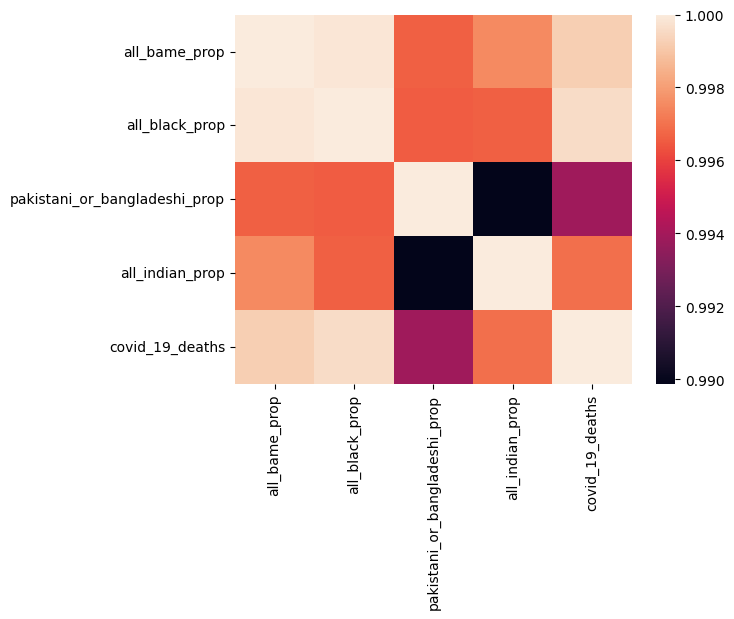

In [43]:
# Build a correlation heatmap

sns.heatmap(lon_regions_df.corr(),annot=False) 

C:\Users\y_har\AppData\Local\Temp\ipykernel_16612\2960531539.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cols = lon_regions_df.corr().nlargest(k, 'covid_19_deaths')['covid_19_deaths'].index


'\nOBSERVATIONS\n\n1."all_black_prop" has strong positive correlation with "covid_19_deaths" \n2."all_bame_prop" has strong positive correlation with "covid_19_deaths" \n3."all_indian_prop" has a strong negative correlation with "pakistani_or_bangladeshi_prop".\n(We can infer there is a linear relationship between all_black_prop and covid_19_deaths and\ncovid_19_deaths and all_bame_prop.)\n\n'

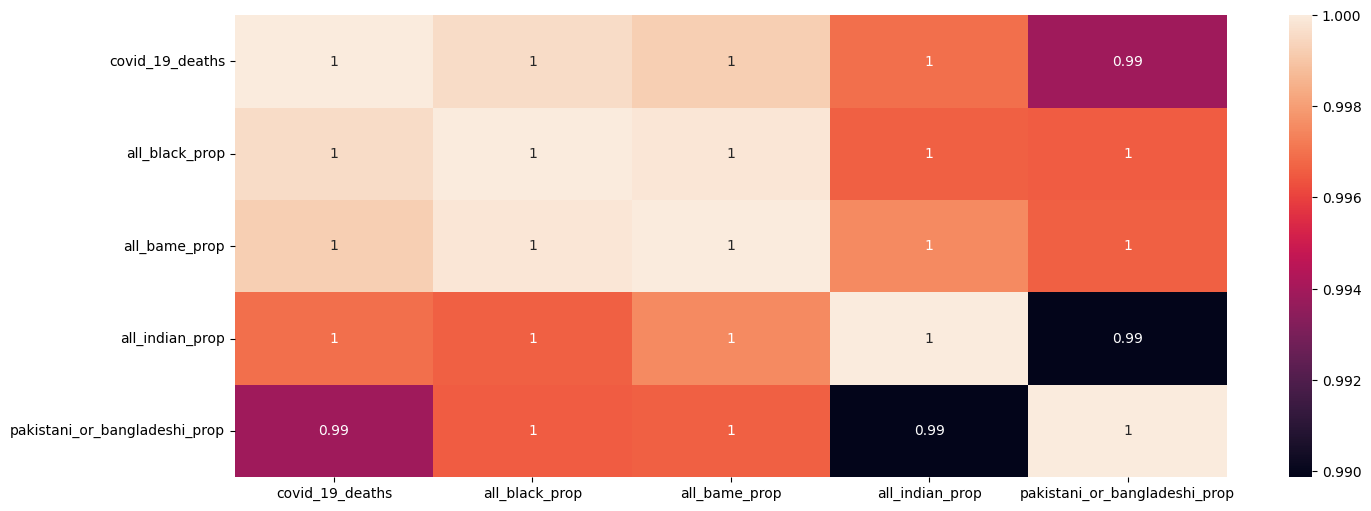

In [44]:
# Covid-19 deaths correlation matrix
plt.figure(figsize=(16, 6))
k = 5  # number of variables for heatmap
cols = lon_regions_df.corr().nlargest(k, 'covid_19_deaths')['covid_19_deaths'].index
cm = lon_regions_df[cols].corr()

sns.heatmap(cm, annot=True)

"""
OBSERVATIONS

1."all_black_prop" has strong positive correlation with "covid_19_deaths" 
2."all_bame_prop" has strong positive correlation with "covid_19_deaths" 
3."all_indian_prop" has a strong negative correlation with "pakistani_or_bangladeshi_prop".
(We can infer there is a linear relationship between all_black_prop and covid_19_deaths and
covid_19_deaths and all_bame_prop.)

"""
